In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive/IEEE JMI

/content/gdrive/My Drive/IEEE JMI


In [64]:
data_r=pd.read_csv("train.csv")

In [65]:
print("Rows, Columns:",data_r.shape)
data_r.head()

Rows, Columns: (159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [66]:
filter=data_r["comment_text"] != ""
data_r=data_r[filter]
data_r=data_r.dropna()

In [67]:
print(data_r.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [68]:
data_r.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [69]:
rowS = data_r.iloc[:,2:].sum(axis=1)
clean_comments = (rowS==0).sum(axis=0)
print("Total number of comments = ",len(data_r))
print("Number of clean comments = ",clean_comments)
print("Number of comments with labels =",(len(data_r)-clean_comments))

Total number of comments =  159571
Number of clean comments =  143346
Number of comments with labels = 16225


In [70]:
comments_labels=data_r[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]
comments_labels.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


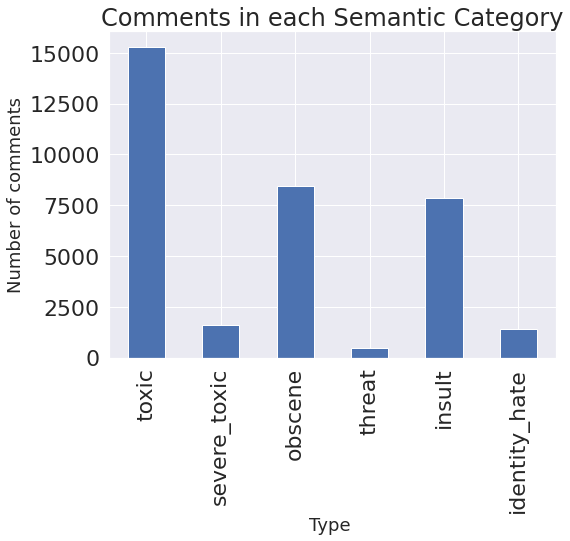

In [78]:
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=8
fig_size[1]=6
plt.rcParams["figure.figsize"]=fig_size
plt.title("Comments in each Semantic Category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Type ', fontsize=18)

comments_labels.sum(axis=0).plot.bar()

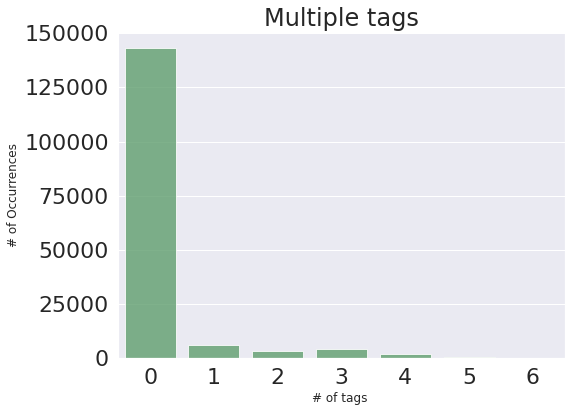

In [79]:
color = sns.color_palette()
x=rowS.value_counts()
plt.figure(figsize=(8,6))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[2])
plt.title("Multiple tags")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)
plt.show()


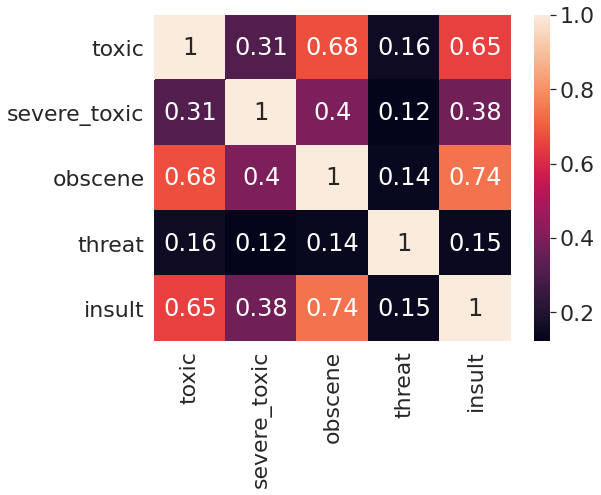

In [77]:
h_df=data_r.iloc[:,2:-1]
corr=h_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True)

In [54]:
labels=list(data_r.columns.values)
labels=labels[2:]
print(labels)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [55]:
lcount=[]
for r in labels:
    lcount.append((r, data_r[r].sum()))
df_lcount=pd.DataFrame(lcount, columns=['category', 'number of comments'])
df_lcount

,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


In [56]:
rowS = data_r.iloc[:,2:].sum(axis=1)
rowS

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Length: 159571, dtype: int64

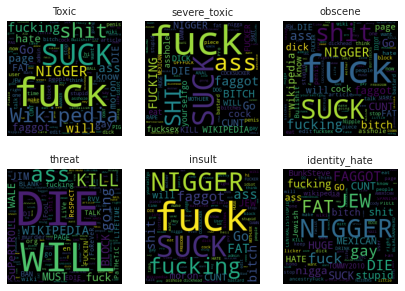

In [92]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(7,5))
rec=data_r[data_r.toxic==1]
text=rec.comment_text.values
cloud_1=WordCloud(stopwords=STOPWORDS,background_color='black',collocations=False,width=200,
                  height=200).generate(" ".join(text))
plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Toxic",fontsize=10)
plt.imshow(cloud_1)

rec=data_r[data_r.severe_toxic==1]
text=rec.comment_text.values
cloud_2=WordCloud(stopwords=STOPWORDS,background_color='black',collocations=False,width=200,
                  height=200).generate(" ".join(text))
plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("severe_toxic",fontsize=10)
plt.imshow(cloud_2)

rec=data_r[data_r.obscene==1]
text=rec.comment_text.values
cloud_3=WordCloud(stopwords=STOPWORDS,background_color='black',collocations=False,width=200,
                  height=200).generate(" ".join(text))
plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("obscene",fontsize=10)
plt.imshow(cloud_3)

rec=data_r[data_r.threat==1]
text=rec.comment_text.values
cloud_4=WordCloud(stopwords=STOPWORDS,background_color='black',collocations=False,width=200,
                  height=200).generate(" ".join(text))
plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("threat",fontsize=10)
plt.imshow(cloud_4)

rec=data_r[data_r.insult==1]
text=rec.comment_text.values
cloud_5=WordCloud(stopwords=STOPWORDS,background_color='black',collocations=False,width=200,
                  height=200).generate(" ".join(text))
plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("insult",fontsize=10)
plt.imshow(cloud_5)

rec=data_r[data_r.identity_hate==1]
text=rec.comment_text.values
cloud_6=WordCloud(stopwords=STOPWORDS,background_color='black',collocations=False,width=200,
                  height=200).generate(" ".join(text))
plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("identity_hate",fontsize=10)
plt.imshow(cloud_6)